In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [106]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
print(df.shape)
print(df.head())


(1470, 35)
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLeve

In [107]:

df.drop(["EmployeeNumber", "EmployeeCount", "Over18", "StandardHours"], axis=1, inplace=True)

df["Attrition"] = df["Attrition"].apply(lambda x: 1 if x == "Yes" else 0)

# Encode categoricals
le = LabelEncoder()
for col in df.select_dtypes(include="object").columns:
    df[col] = le.fit_transform(df[col])


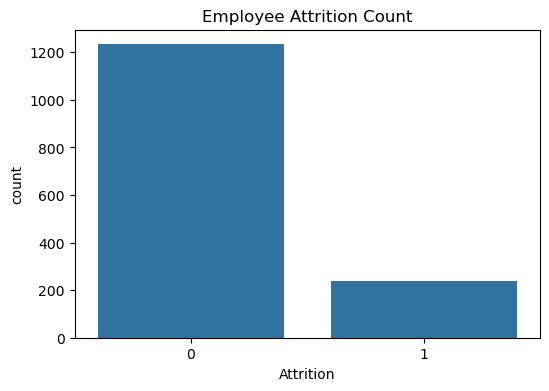

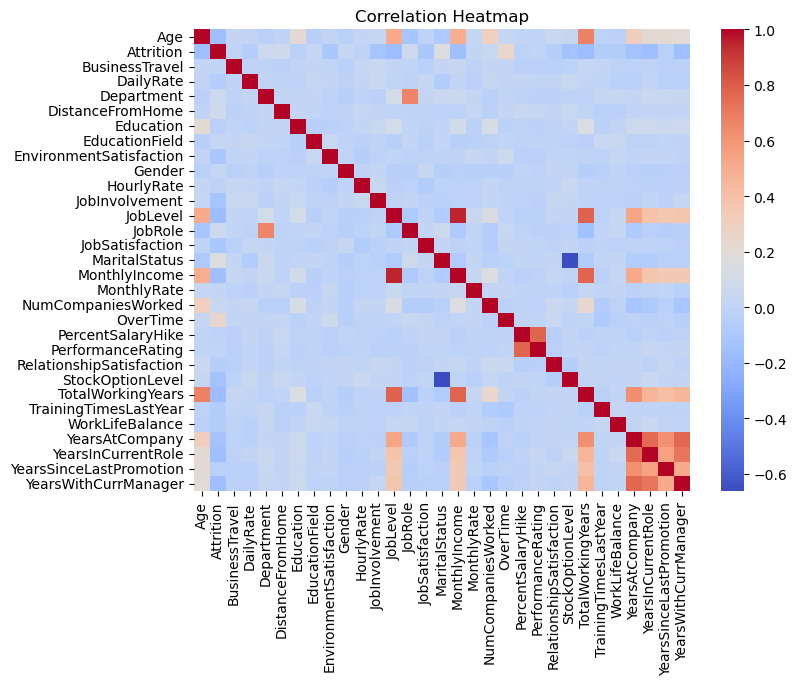

In [108]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Attrition")
plt.title("Employee Attrition Count")
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()


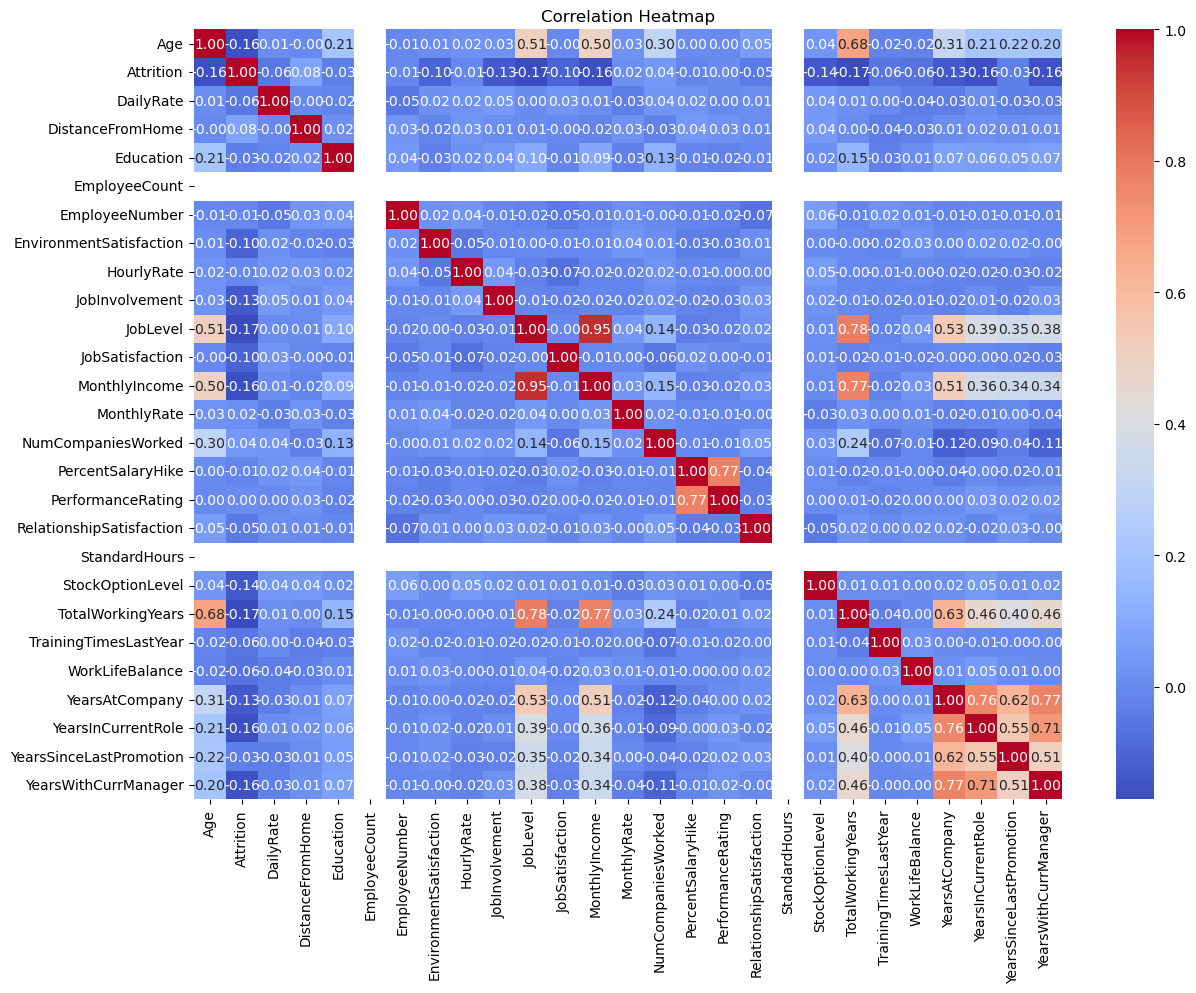

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df_encoded = df.copy()
df_encoded['Attrition'] = df_encoded['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
corr = df_encoded.corr(numeric_only=True)

plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.savefig("correlation_heatmap.png", dpi=65, bbox_inches='tight')  
plt.show()


In [110]:
X = df.drop("Attrition", axis=1)
y = df["Attrition"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


ValueError: could not convert string to float: 'Travel_Rarely'

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
# Train Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


In [ ]:
# Predict
y_pred_log = log_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Evaluation Metrics
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_log))
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       247
           1       0.69      0.38      0.49        47

    accuracy                           0.87       294
   macro avg       0.79      0.68      0.71       294
weighted avg       0.86      0.87      0.86       294

Random Forest Report:
               precision    recall  f1-score   support

           0       0.85      0.97      0.91       247
           1       0.46      0.13      0.20        47

    accuracy                           0.84       294
   macro avg       0.66      0.55      0.55       294
weighted avg       0.79      0.84      0.80       294



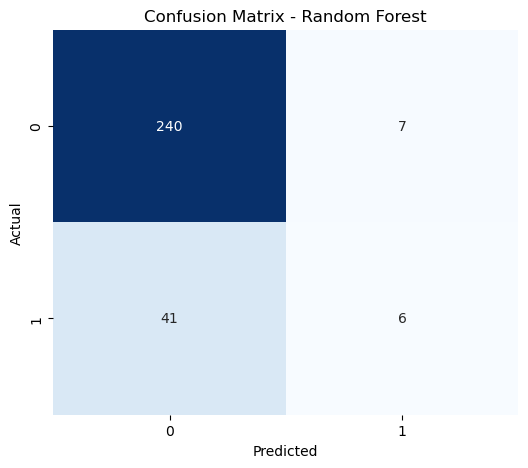

In [111]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


y_pred_log = log_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)


print("Logistic Regression Report:\n", classification_report(y_test, y_pred_log))
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))


plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")


plt.savefig("confusion_matrix_rf_heatmap.png", dpi=65, bbox_inches='tight')


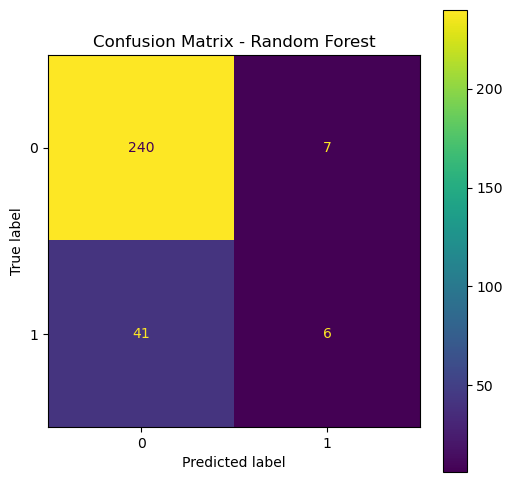

In [113]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are already defined
cm = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(6, 6))  # Set figure size if needed
disp.plot(ax=ax)
plt.title("Confusion Matrix - Random Forest")

# Save the image
plt.savefig("confusion_matrix_rf.png", dpi=90, bbox_inches='tight')  # You can change name & format

# Optional: Show the plot
plt.show()


In [114]:
importances = rf_model.feature_importances_
feat_names = X.columns
imp_df = pd.DataFrame({"Feature": feat_names, "Importance": importances}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=imp_df)
plt.title("Feature Importance (Random Forest)")
plt.tight_layout()
plt.show()


ValueError: All arrays must be of the same length

In [115]:
importances = rf_model.feature_importances_
feat_names = X.columns
imp_df = pd.DataFrame({"Feature": feat_names, "Importance": importances}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=imp_df)
plt.title("Feature Importance (Random Forest)")
plt.tight_layout()

plt.savefig("feature_importance_rf.png", dpi=80, bbox_inches='tight')

plt.show()


ValueError: All arrays must be of the same length

In [104]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Logistic Regression Accuracy: 0.8741496598639455
Random Forest Accuracy: 0.8367346938775511
